Import STDLIB

In [8]:
import numpy as np # for computation
import matplotlib.pyplot as plt # for plotting (line below keeps plots within notebook)
import matplotlib.ticker # to modify tick marks
%matplotlib inline
from astropy.io import ascii # for reading in CSV
from PIL import Image # for manipulating jpgs, pngs, etc.
import os # for directories, etc. 

Read in and Format Data

In [25]:
data_file = ascii.read('./Figure_Data.csv')
#print data_file.colnames

def find_angular_size(size, distance, angle='rad'):
    if angle == 'rad':
        return size / distance
    elif angle == 'arcsec':
        return 2.06265e5 * size / distance 

objects = data_file['Object']
size = data_file['Radius (km)']
distance = data_file['Average Distance from Earth (km)']

print find_angular_size(size[objects=='Sirius'], distance[objects=='Sirius'], angle='arcsec')

#for i in range(len(data_file)):
#print data_file['Object'], find_angular_size(size, distance,angle='arcsec') # just checking
    
#print 'Pictures gathered so far:', os.listdir('./astro_scale/'), '\n'
#print 'Objects in CSV:', [i for i in objects]

objects_to_plot = {
    'Mercury':[find_angular_size(size[objects=='Mercury'], distance[objects=='Mercury'], angle='arcsec')[0], './astro_scale/Mercury_in_color.jpg'],
    'ISS':[find_angular_size(size[objects=='ISS'], distance[objects=='ISS'], angle='arcsec')[0], './astro_scale/space_station_over_earth.jpg'],
    'Moon':[find_angular_size(size[objects=='Moon'], distance[objects=='Moon'], angle='arcsec')[0], './astro_scale/FullMoon2010.jpg'],
    'Andromeda':[find_angular_size(size[objects=='Andromeda'], distance[objects=='Andromeda'], angle='arcsec')[0], './astro_scale/Andromeda_Galaxy_(with_h-alpha).jpg']    
}

keys = ['Mercury', 'ISS', 'Moon', 'Andromeda']

  Radius (km)   
----------------
0.00301172208589


Angular Resolution Plot

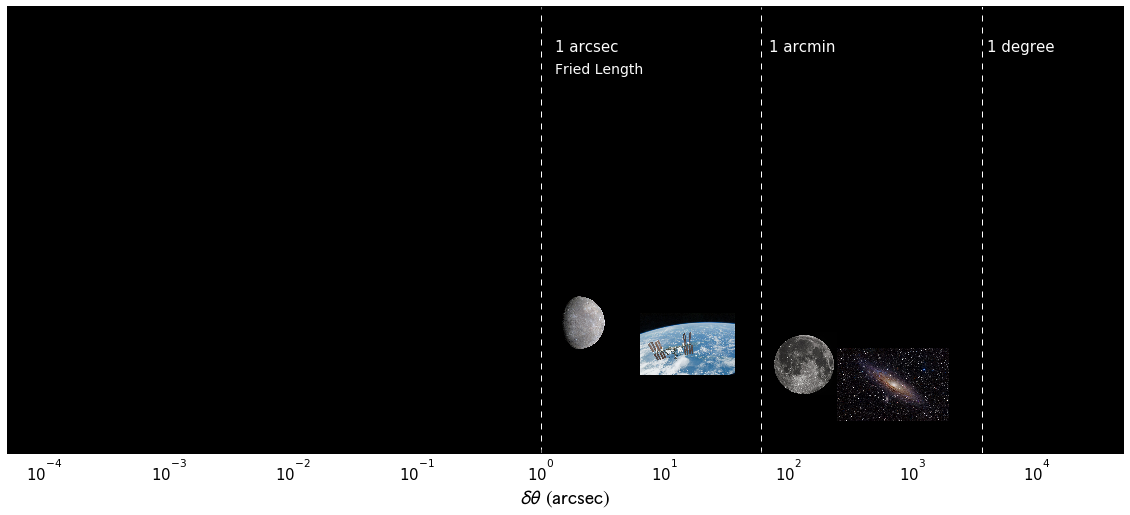

In [29]:
lbl_ft_sz = 18 # label font size

from matplotlib import rc # needed to modify TeX font; I don't like serif fonts too much
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

fig = plt.figure(figsize=(20,8)) # create figure and set size - W, H, in inches
ax = plt.subplot(111) # add an axis object

ax.set_axis_bgcolor('black') # set background color to black
ax.set_xscale('log') # make x-axis log scale
ax.set_xlim(5e-5, 5e4) # set x-axis limits
ax.set_xticks([10 ** i for i in range(-4, 5)])
#ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
ax.set_xlabel(r'$\delta \theta \ (\rm{arcsec})$', size=lbl_ft_sz + 2) # label x-axis
plt.setp(ax.get_xticklabels(), fontsize=15) # make x-axis tick marks larger
plt.setp(ax, yticks=[]) # remove y-axis tick marks

ax.plot([1, 1], [0, 1], color='white', linestyle='--')
ax.text(1.3, 0.9, '1 arcsec', color='white', size=lbl_ft_sz - 3)
ax.text(1.3, 0.85, 'Fried Length', color='white', size=lbl_ft_sz - 4)

ax.plot([60, 60], [0, 1], color='white', linestyle='--')
ax.text(70, 0.9, '1 arcmin', color='white', size=lbl_ft_sz - 3)

ax.plot([3600, 3600], [0, 1], color='white', linestyle='--')
ax.text(4000, 0.9, '1 degree', color='white', size=lbl_ft_sz - 3)

for i in range(len(keys)):
    obj = objects_to_plot[keys[i]]
    x, y = 0.07 * (np.log10(obj[0]) + 4) + 0.14, -0.04 * i + 0.3 # find x,y positions on plot (these are analogous to percentages)
    sp = plt.axes([x, y, 0.1, 0.1 * np.exp(0.08 * i)]) # create a separate axes object within the main plot
    sp.axis('off') # remove the frame of the axes object
    data = Image.open(obj[1]) # open image
    data = np.asarray(data) # convert to numpy array
    sp.imshow(data, interpolation='nearest') # plot 2D data with imshow
    plt.setp(sp, yticks=[], xticks=[]) # remove tick marks
    

plt.show() # show plot

In [24]:
print 1000 / (2.75 * 1.5e8)

2.42424242424e-06
